In this assignment you can identify a dataset of your interest and perform exploratory data analysis to better understand the data, investigate initial questions about it and develop preliminary insights and hypotheses. Your final submission will be a blog post consisting of a series of captioned visualizations that convey the key insights gained over the course of your analysis. You need to post the blog to medium or your github website.

Documenting the data analysis process you went through is the main pedagogical goal of the assignment and more important than the design of the final visualization.

We will go over the details of the project during class hours next week.

##**Part 1: Select and Prepare the Data**

You should start by picking a topic area of interest to you and finding a dataset that can provide insights into that topic. We have provided some datasets below that you can start from. But we encourage you to investigate a different topic and dataset. If you self-select a dataset and are concerned about its appropriateness for the assignment, you can check with the TAs regarding the same.

**Note:** The data collection and preparation (also known as data wrangling) can be a very tedious and time-consuming process. Be sure you have sufficient time to conduct exploratory analysis, after preparing the data.

After selecting a topic and dataset – but prior to analysis – you should write down an initial set of at least three questions you’d like to investigate.

In [155]:
#Yuheng Jing
#Exploratoy Data Analysis
#Questions
#Which group of people consist of the largest 2nd language in U.S.?
#In the same age group, which group of 2nd language speakers speak better english?
#In the same age group, which group of 2nd language speakers speak the worst english?
#Which age group speaks the worst and best english? 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline
fr = pd.read_csv('2ndlanspeaker.csv',index_col=[0,1], skipinitialspace=True)
frame = pd.DataFrame(fr, columns={'TotalSpeak','PercentSpeak','EngFluent','EngFluent%','EngNotFluent','EngNotFluent%'})
frame.index.names = ['Language', 'AgeGroup']

#plot styling
plt.rcParams['font.sans-serif'] = 'DM Sans'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#E86D52'
plt.rcParams['axes.labelcolor']= '#6873B6'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'
plt.rcParams['font.size']=12
color_palette_list = ['#FF3C38','#6699CC', '#FFF275', '#FF8C42']
frame


EngNotFluent  ...  PercentSpeak
Language                 AgeGroup                ...              
Spanish                  Total       16131307.0  ...          13.5
                         5to17        1544798.0  ...         2.80%
                         18to64      12196801.0  ...         9.40%
                         65+          2389708.0  ...         1.30%
Indo-European            Total        3421414.0  ...           3.7
                         5to17         302092.0  ...         0.50%
                         18to64       2182909.0  ...         2.50%
                         65+           936413.0  ...         0.70%
Asian and Pacific Island Total        4843095.0  ...           3.6
                         5to17         296035.0  ...         0.40%
                         18to64       3322647.0  ...         2.60%
                         65+          1224413.0  ...         0.60%
Other                    Total        1068351.0  ...           1.2
                         5to17         116901.0  ...         0.20%
                         18to64        793132.0  ...         0.80%
                         65+           158318.0  ...         0.10%
NaN                      NaN                NaN  ...           NaN
                         NaN                NaN  ...           NaN
                         NaN                NaN  ...           NaN
                         NaN                NaN  ...           NaN

[20 rows x 6 columns]

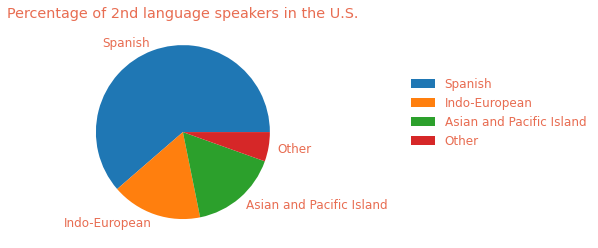

In [159]:
#Which group of people consist of the largest 2nd language in U.S.?
idx = pd.IndexSlice
fig, ax = plt.subplots()
percentages = frame.loc[idx[:, 'Total'], idx['PercentSpeak']]
labels = ['Spanish', 'Indo-European','Asian and Pacific Island','Other']
ax.pie(percentages, labels=labels)
ax.set_title("Percentage of 2nd language speakers in the U.S.")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

Language                  AgeGroup
Spanish                   5to17       0.820
Indo-European             5to17       0.809
Asian and Pacific Island  5to17       0.766
Other                     5to17       0.820
Name: EngFluent%, dtype: float64
['Spanish', 'Indo-European', 'Asian and Pacific Island', 'Other']


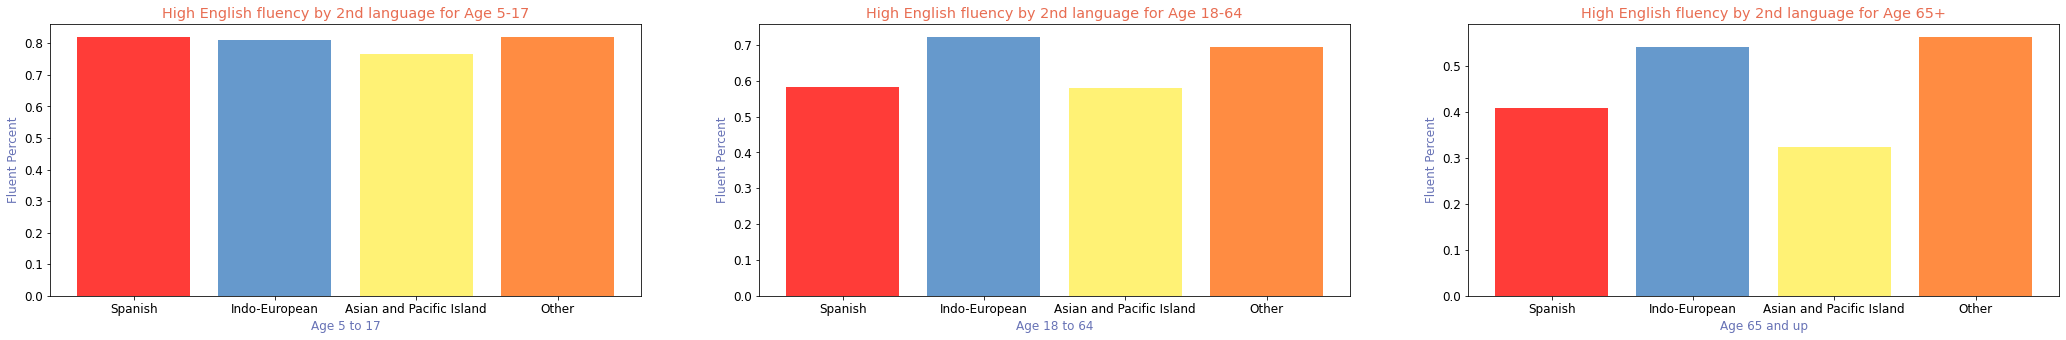

In [157]:

#In the same age group, which group of 2nd language speakers speak better english?
myFig, myAxes = plt.subplots(1,3,sharey=True,figsize=(36,5))

engfluent1 = frame.loc[idx[:, '5to17'], idx['EngFluent%']]
engfluent2 = frame.loc[idx[:, '18to64'], idx['EngFluent%']]
engfluent3 = frame.loc[idx[:, '65+'], idx['EngFluent%']]
lan = ['Spanish','Indo-European', 'Asian and Pacific Island','Other']
print(engfluent1)
print(lan)
plt.ylabel('Fluent Percent')
plt.yticks([np.arange(0, 1, step=0.2)])
#1st plot
plt.subplot(1,3,1, title="High English fluency by 2nd language for Age 5-17")
plt.ylabel('Fluent Percent')
plt.xlabel('Age 5 to 17')
plt.bar(lan, engfluent1, color = color_palette_list)
#2nd plot
plt.subplot(1,3,2, title="High English fluency by 2nd language for Age 18-64")
plt.ylabel('Fluent Percent')
plt.xlabel('Age 18 to 64')
plt.bar(lan, engfluent2, color = color_palette_list)
#3rd plot
plt.subplot(1,3,3, title="High English fluency by 2nd language for Age 65+")
plt.ylabel('Fluent Percent')
plt.xlabel('Age 65 and up')
plt.bar(lan, engfluent3, color = color_palette_list)

plt.show()

Language                  AgeGroup
Spanish                   5to17       0.180
Indo-European             5to17       0.191
Asian and Pacific Island  5to17       0.234
Other                     5to17       0.180
Name: EngNotFluent%, dtype: float64
['Spanish', 'Indo-European', 'Asian and Pacific Island', 'Other']


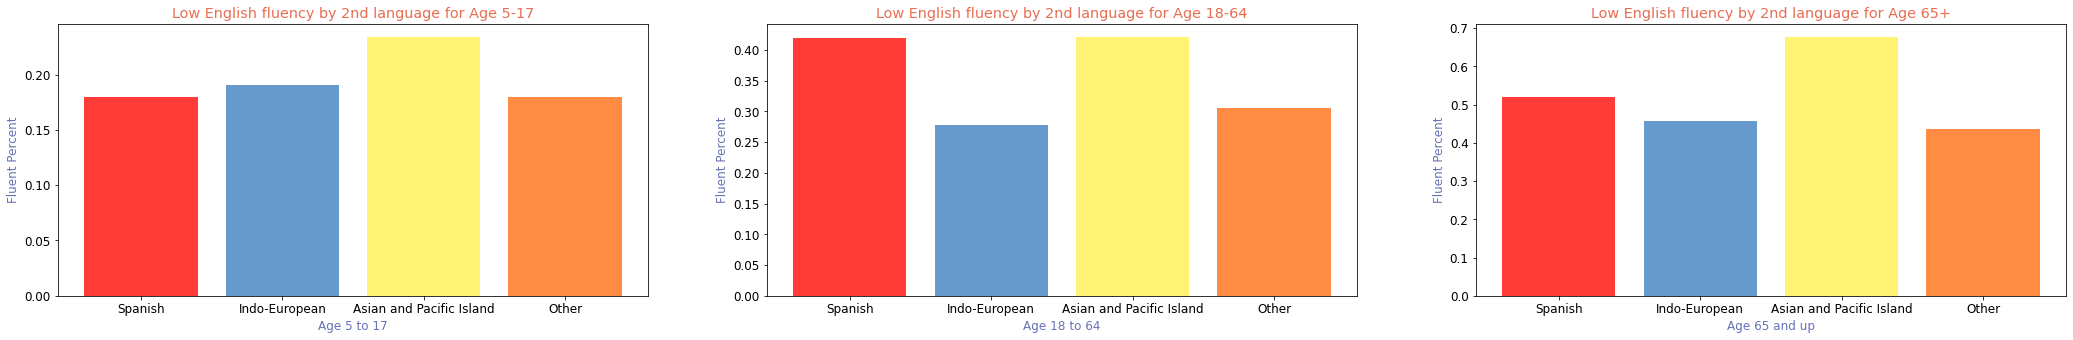

In [158]:
#In the same age group, which group of 2nd language speakers speak the worst english?
myFig1, myAxes1 = plt.subplots(1,3,sharey=True,figsize=(36,5))
idx = pd.IndexSlice
engnotfluent1 = frame.loc[idx[:, '5to17'], idx['EngNotFluent%']]
engnotfluent2 = frame.loc[idx[:, '18to64'], idx['EngNotFluent%']]
engnotfluent3 = frame.loc[idx[:, '65+'], idx['EngNotFluent%']]
print(engnotfluent1)
print(lan)
plt.ylabel('Fluent Percent')
plt.yticks([np.arange(0, 1, step=0.2)])
#1st plot
plt.subplot(1,3,1, title="Low English fluency by 2nd language for Age 5-17")
plt.ylabel('Fluent Percent')
plt.xlabel('Age 5 to 17')
plt.bar(lan, engnotfluent1, color = color_palette_list)
#2nd plot
plt.subplot(1,3,2, title="Low English fluency by 2nd language for Age 18-64")
plt.ylabel('Fluent Percent')
plt.xlabel('Age 18 to 64')
plt.bar(lan, engnotfluent2, color = color_palette_list)
#3rd plot
plt.subplot(1,3,3, title="Low English fluency by 2nd language for Age 65+")
plt.ylabel('Fluent Percent')
plt.xlabel('Age 65 and up')
plt.bar(lan, engnotfluent3, color = color_palette_list)

plt.show()

<class 'pandas.core.frame.DataFrame'>
AgeGroup
18to64    28962359.0
5to17      9824141.0
65+        3551678.0
Total     42338178.0
Name: EngFluent, dtype: float64
Index(['18to64', '5to17', '65+', 'Total'], dtype='object', name='AgeGroup')


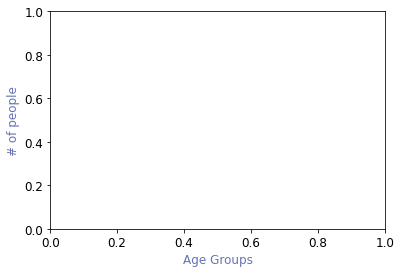

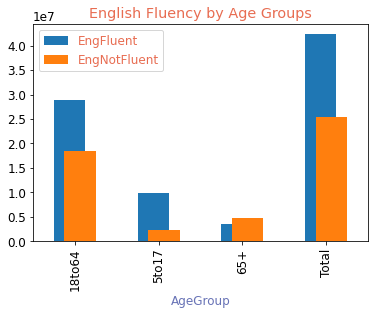

In [138]:
#Which age group speaks the worst and best english? 
# myFig2, myAxes2 = plt.subplots(figsize=(10,5))
ageframeF = frame.groupby('AgeGroup')[["EngFluent", "EngNotFluent"]].sum()
print(type(ageframeF))
ef=ageframeF['EngFluent']
enf=ageframeF['EngNotFluent']
ages=ageframeF.index
print(ef)
print(ages)
width=0.25
plt.ylabel('# of people')
plt.xlabel('Age Groups')
ageframeF.plot(kind="bar")
plt.title("English Fluency by Age Groups")
plt.bar(ages, ef, width)
plt.bar(ages, enf, width)
plt.xticks()
plt.legend(loc='best')

## **Part 2: Exploratory Analysis**

Once you have picked the dataset and performed the initial data wrangling, you will perform exploratory analysis to investigate your data. For this assignment we would like you to use Pandas, NumPy and matplotlib to help you with the analysis. 

**Phase 1:** You should start the exploration by first examining the shape and structure of your data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. Are there any surprising relationships between the dimensions/variables? Make sure to perform sanity checks for patterns you expect to see! Note that it may be the case that after doing a bit of exploration in phase 1 you find that your data is not as interesting as you first thought. In such cases you might consider returning to Part 1 and identifying a different dataset to work with. Such iteration on choosing the dataset is common, but also time-consuming, so make sure you leave time in your schedule for this.

**Phase 2:** Next, you should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, create a visualization that might provide a useful answer. Then refine the visualization (by adding additional variables, changing the sort ordering or axis scales, filtering or subsetting data, etc.) to develop better perspectives explore unexpected observations, or sanity check your assumptions. You should repeat this process for each of your questions, and also feel free to revise your questions or branch off to explore new questions as the data warrants.

## **Final Deliverable**

Your final submission should consist of captioned visualizations detailing your most important insights. You will also work on writing and posting a blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

https://data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data - https://data.census.gov/

Federal Elections Commission - Campaign finance and expenditures. - https://www.fec.gov/data/

Federal Aviation Administration - FAA data - https://www.faa.gov/data_research/

https://www.kaggle.com/

https://archive.ics.uci.edu/ml/index.php

https://github.com/awesomedata/awesome-public-datasets - Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis. - https://tvnews.stanford.edu/data

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Sunday (03/07/2021)

To submit your assignment, download your notebook and zip all the necessary files(data files). Submit the zipped file to balckboard. Make sure the notebook and the zipped file is named in the format - EDA_LastName_FirstName. Be sure to include the link to access your blog in your notebook.

Also include the link to your notebook in the submission. 

We will provide more details on the blog during the next week of class.

**Note** - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.